# **K-MEANS CLUSTERING**

# Step-1 : Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Step-2 : Data Collection

In [2]:
# Read the data

df = pd.read_csv('customer_segmentation.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


# Step-3 : Exploratory Data Analysis (EDA)

In [3]:
# Shape of the data

df.shape

(10695, 11)

In [4]:
# Describe the numerical data

df.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [5]:
# Describe the categorical data

df.describe(include='object')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,10695,10505,10593,10533,10695,10587,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,5841,6163,6570,3318,6494,6910,2268


In [6]:
# Check for duplicates

df.duplicated().sum()

np.int64(0)

In [7]:
# Check for missing values

df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
dtype: int64

# Step-4 : Data Preprocessing

In [8]:
# Drop the unnecessary columns

df.drop(columns=["ID", "Segmentation", "Work_Experience"], inplace=True)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,High,6.0,Cat_6


In [9]:
# Fill the missing columns with the mode

columns = ["Ever_Married", "Graduated", "Profession", "Family_Size", "Var_1"]

for column in columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

df.isnull().sum()

C:\Users\Mallikarjun B Patil\AppData\Local\Temp\ipykernel_17820\2292344488.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


Gender            0
Ever_Married      0
Age               0
Graduated         0
Profession        0
Spending_Score    0
Family_Size       0
Var_1             0
dtype: int64

In [10]:
# Another way to fill the missing values

'''
df["Ever_Married"].fillna(df["Ever_Married"].mode()[0], inplace=True)
df["Graduated"].fillna(df["Graduated"].mode()[0], inplace=True)
df["Profession"].fillna(df["Profession"].mode()[0], inplace=True)
df["Family_Size"].fillna(df["Family_Size"].mode()[0], inplace=True)
df["Var_1"].fillna(df["Var_1"].mode()[0], inplace=True)

df.isnull().sum()
'''

'\ndf["Ever_Married"].fillna(df["Ever_Married"].mode()[0], inplace=True)\ndf["Graduated"].fillna(df["Graduated"].mode()[0], inplace=True)\ndf["Profession"].fillna(df["Profession"].mode()[0], inplace=True)\ndf["Family_Size"].fillna(df["Family_Size"].mode()[0], inplace=True)\ndf["Var_1"].fillna(df["Var_1"].mode()[0], inplace=True)\n\ndf.isnull().sum()\n'

In [11]:
# Convert the categorical columns to numerical columns using one-hot encoding

df = pd.get_dummies(df, drop_first=True)
df.head()

,Age,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,4.0,True,False,False,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,38,3.0,False,True,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,67,1.0,False,True,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,67,2.0,True,True,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
4,40,6.0,False,True,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [12]:
# Final datatypes of the columns

df.dtypes

Age                           int64
Family_Size                 float64
Gender_Male                    bool
Ever_Married_Yes               bool
Graduated_Yes                  bool
Profession_Doctor              bool
Profession_Engineer            bool
Profession_Entertainment       bool
Profession_Executive           bool
Profession_Healthcare          bool
Profession_Homemaker           bool
Profession_Lawyer              bool
Profession_Marketing           bool
Spending_Score_High            bool
Spending_Score_Low             bool
Var_1_Cat_2                    bool
Var_1_Cat_3                    bool
Var_1_Cat_4                    bool
Var_1_Cat_5                    bool
Var_1_Cat_6                    bool
Var_1_Cat_7                    bool
dtype: object

In [13]:
# Standardize the data

scaler = StandardScaler()
df = scaler.fit_transform(df)

# Step-5 : Model Development

In [14]:
# Calculate the inertia and silhouette scores for different values of K

inertia_values = []
silhouette_scores = []
K_range = range(2, 11)  # You can adjust the range as needed

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(df)
    
    # Inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(silhouette)

In [15]:
# Display the results of KMeans clustering using Inertia and Silhouette Score

kmeans_results = pd.DataFrame({"Clusters": K_range, "Inertia": inertia_values, "Silhouette": silhouette_scores})
kmeans_results

,Clusters,Inertia,Silhouette
0,2,213303.751291,0.264602
1,3,198367.676255,0.170961
2,4,177129.490033,0.149671
3,5,163634.618860,0.172574
4,6,152631.736535,0.191513
5,7,142276.958858,0.199626
6,8,138017.152293,0.194677
7,9,126974.467226,0.208606
8,10,117979.200854,0.228217


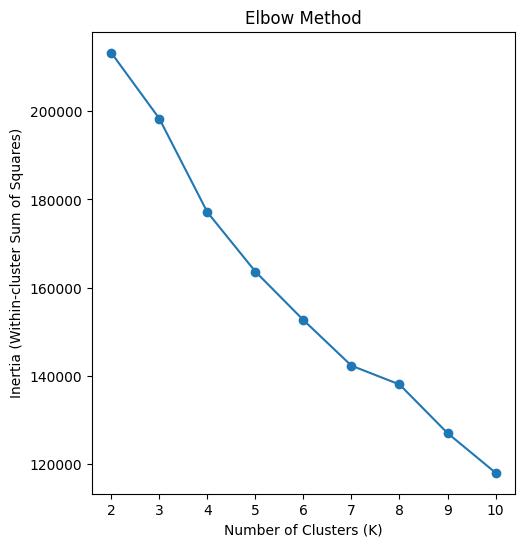

In [16]:
# Plot the Elbow Method graph to find the optimal number of clusters

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

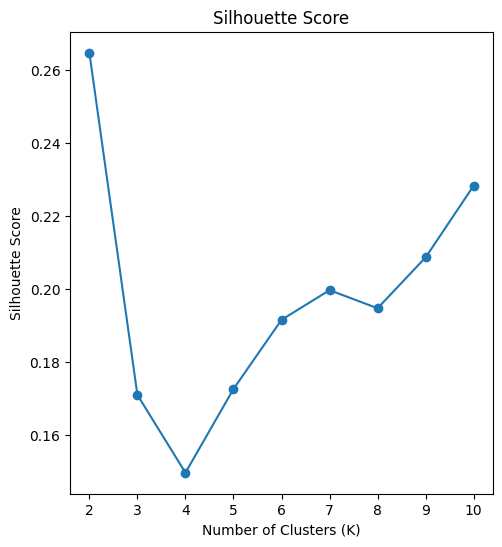

In [17]:
# Plot the Silhouette Score graph to find the optimal number of clusters

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [18]:
# Find the K value from the Elbow Method
elbow_K = 7  # Replace with the K value where you observe the "elbow" in the plot

# Find the K value from the Silhouette Score
silhouette_K = 7  # Replace with the K value that maximizes the Silhouette Score

# Print the selected K values
print(f"Selected K value from Elbow Method: {elbow_K}")
print(f"Selected K value from Silhouette Score: {silhouette_K}")

Selected K value from Elbow Method: 7
Selected K value from Silhouette Score: 7


In [19]:
'''You can use either the K value from the Elbow Method or the Silhouette Score, based on your preference and
the characteristics of the dataset'''

'You can use either the K value from the Elbow Method or the Silhouette Score, based on your preference and\nthe characteristics of the dataset'